# 数据预处理

In [1]:
# 载入数据
from sklearn.datasets import load_iris
# iris.data 表示特征矩阵, iris.target 表示类别向量
iris=load_iris().data
iris[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [2]:
iris_target=load_iris().target
iris_target[:5]

array([0, 0, 0, 0, 0])

In [3]:
#数据预处理， sklearn.preprocessing 提供一些预处理工具
# MinMaxScaler 作用是将属性缩放到一个指定范围, 即(x-min)/(max-min), 也称归一化
from sklearn.preprocessing import MinMaxScaler
MinMaxTransformer=MinMaxScaler()

In [4]:
MinMaxTransformer.fit(iris) #计算最大, 最小值
iris_transformed=MinMaxTransformer.transform(iris)
iris_transformed[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [5]:
#切分数据集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(iris_transformed, iris_target, random_state=14)

# 构造 SVM 分类器

1. 利用默认参数训练，并预测:

In [6]:
from sklearn.svm import SVC
import numpy as np
svm=SVC()
svm.fit(X_train, y_train)
predict_labels=svm.predict(X_test)
accuracy=np.mean(predict_labels==y_test)*100
print("the accuracy of SVM model is {0}%".format(accuracy))

the accuracy of SVM model is 97.36842105263158%


2. 利用 sklearn 提供的 Grid_searchCV 来寻找最佳参数：

In [7]:
# 利用 sklearn 提供的 Grid_searchCV 来寻找最佳参数
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
svm=SVC()
#候选参数
tuned_parameters = [{'n_estimators': [10, 50, 100], 'learning_rate': [.5, 1, 2],
'algorithm': ['SAMME', 'SAMME.R']}]
clf=GridSearchCV(svm, tuned_parameters)
clf.fit(X_train, y_train)
#输出最优参数
print("Best parameters: ")
print(clf.best_params_)
for params, mean_score, scores in clf.grid_scores_:
    print("{0} (+/-{1}) for {2}".format(mean_score, scores.std()*2, params))

Best parameters: 
{'C': 1, 'kernel': 'linear'}
0.375 (+/-0.009387856744060414) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.375 (+/-0.009387856744060414) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.375 (+/-0.009387856744060414) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.375 (+/-0.009387856744060414) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.875 (+/-0.05235532950912191) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.375 (+/-0.009387856744060414) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.9285714285714286 (+/-0.04828040611231049) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.875 (+/-0.05235532950912191) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.9553571428571429 (+/-0.048950967308314886) for {'C': 1, 'kernel': 'linear'}
0.9285714285714286 (+/-0.06541323607768817) for {'C': 10, 'kernel': 'linear'}
0.9285714285714286 (+/-0.06541323607768817) for {'C': 100, 'kernel': 'linear'}
0.9285714285714286 (+/-0.06541323607768817) for {'C': 1000, 'kernel'

C:\Users\HASEE\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\HASEE\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


3. 利用获得的参数预测：

In [8]:
# 使用获得的参数进行预测
from sklearn.svm import SVC
svm=SVC(C=1000, gamma=0.001, kernel='rbf')
svm.fit(X_train, y_train)
predict_labels=svm.predict(X_test)
accuracy=np.mean(predict_labels==y_test)*100
print("the accuracy of SVM model is {0}%".format(accuracy))

the accuracy of SVM model is 97.36842105263158%


4. 使用 matplotlib 描述不同参数设置下模型准确率的变化：

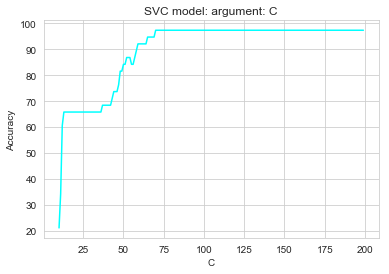

In [10]:
# 使用 matplotlib 描述不同参数设置下模型准确率的变化
Cs=[]
accuracies=[]
for c in range(10, 200, 1):
    svm=SVC(C=c, gamma=0.001, kernel= 'rbf')
    svm.fit(X_train, y_train)
    predict_labels= svm.predict(X_test)
    accuracy = np.mean(predict_labels==y_test)*100
    # print("the accuracy of SVM model with C = {0} is {1}".format(c, accuracy))
    Cs.append(c)
    accuracies.append(accuracy)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.title("SVC model: argument: C")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.plot(Cs, accuracies, 'cyan')
plt.show()

# 完成习题

> iris 数据集有哪几个属性和类别？

使用load_iris()中的feature_names方法可以获得数据集的属性名称如下:

In [10]:
data = load_iris()
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

使用load_iris()中的target_name方法可以获得数据集的类别名称如下:

In [11]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

> 利用 sklearn.preprocessing 的标准化（Z-Score）、 归一化（Normalization）分别对 iris 数据集进行预处理，并查看处理后的数据。

对数据进行Z-score标准化处理:

In [12]:
iris = load_iris().data
from sklearn import preprocessing
scaled_iris = preprocessing.scale(iris) # z-score
scaled_iris.mean(axis=0) # 均值为0

array([-1.69031455e-15, -1.63702385e-15, -1.48251781e-15, -1.62314606e-15])

In [13]:
scaled_iris.std(axis=0) # 方差为1

array([1., 1., 1., 1.])

对数据进行Normalization处理:

In [14]:
normalized_iris = preprocessing.normalize(iris)
normalized_iris[:5]

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ]])

> 如何查看 sklearn.svm.SVC 训练结果？

当使用线性核时可以使用coef_方法和intercept_方法查看权重和偏移值:

In [15]:
from sklearn.svm import SVC
import numpy as np
svm=SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
svm.coef_

array([[-0.81501272,  1.41120738, -2.17341427, -1.8491395 ],
       [-0.76230215,  0.5291881 , -1.56010901, -1.38218232],
       [-0.72336481,  0.49372049, -2.65985692, -3.47089235]])

In [17]:
svm.intercept_

array([0.77263683, 1.1708772 , 4.29529373])

当不是使用共线性核时可以使用support_vectors_方法查看支持向量的坐标:

In [24]:
from sklearn.svm import SVC
import numpy as np
svm=SVC(kernel='rbf')
svm.fit(X_train, y_train)
svm.support_vectors_[:5]

array([[0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.19444444, 0.58333333, 0.10169492, 0.125     ],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.22222222, 0.70833333, 0.08474576, 0.125     ]])

> 利用 SVC 对邮件数据集(训练集 horseColicTrainig.txt，测试集 horseColicTest.txt)
进行分类， 并评估预测结果。

利用GridSearchCV()方法选择最优参数:

In [18]:
frTrain = open('horseColicTraining.txt')
frTest = open('horseColicTest.txt')
trainingSet = []; trainingLabels = []
for line in frTrain.readlines():
    currLine = line.strip().split('\t')
    lineArr =[]
    for i in range(21):
        lineArr.append(float(currLine[i]))
    trainingSet.append(lineArr)
    trainingLabels.append(float(currLine[21]))
tuned_parameters = [{'kernel': ['rbf'], 'gamma': ['auto', 1e-4, 1e-3],
'C': [1, 10, 100, 1000], 'probability':[True, False], 'decision_function_shape': ['ovo', 'ovr']}]
svm=SVC()
clf=GridSearchCV(svm, tuned_parameters)
clf.fit(trainingSet, trainingLabels)
#输出最优参数
print("Best parameters: ")
print(clf.best_params_)

Best parameters: 
{'C': 10, 'decision_function_shape': 'ovo', 'gamma': 0.0001, 'kernel': 'rbf', 'probability': True}


训练并计算准确率:

In [19]:
svm = SVC(C=10,gamma=0.0001,kernel='rbf', probability=True,decision_function_shape='ovo')
svm.fit(trainingSet, trainingLabels)
frTest = open('horseColicTest.txt')
testSet = []; testLabels = []
for line in frTest.readlines():
    currLine = line.strip().split('\t')
    lineArr =[]
    for i in range(21):
        lineArr.append(float(currLine[i]))
    testSet.append(lineArr)
    testLabels.append(float(currLine[21]))
predict_labels = svm.predict(testSet)
testLabels = np.array(testLabels)
accuracy = np.mean(predict_labels==testLabels)*100
accuracy

77.61194029850746

计算F1-score:

In [20]:
from sklearn import metrics
metrics.f1_score(testLabels, predict_labels, average=None) 

array([0.61538462, 0.84210526])

绘制混淆矩阵:

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testLabels, predict_labels)

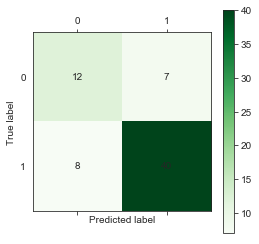

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
plt.matshow(cm,cmap=plt.cm.Greens)
plt.colorbar()
for x in range(len(cm)):
    for y in range(len(cm)):
        plt.annotate(cm[x,y],xy=(x,y),horizontalalignment='center',verticalalignment='center')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()